# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [2]:
#                       student details 1: Svetlana G. 4732
# (if exists)           student details 2: Hen G. 8593

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name:  ChatGPT 

Goal:We used the AI assistant as a technical assistant on specific issues related to syntax, visualization, and adding new features

Propmpt1:What other kinds of plots can help with understanding the model performance or feature impact?
   
Propmpt2: Which new features can improve tumor classification models?

Propmpt3: Why do I get the error and how to fix it?



</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>


## Project Workflow Summary

- **Exploratory Data Analysis (EDA)**:
  - Correlation heatmap to identify relationships between features
  - Distribution plots for key features by diagnosis type

- **Feature Engineering**:
  - Created 5 new features based on medical logic and correlation patterns
  - Examples: area-to-radius ratio, squared concavity, average of “mean” and “worst” features

- **Model Comparison**:
  - Evaluated several algorithms: `SVC`, Logistic Regression, `KNN`, and `Random Forest`

- **Scaling Techniques**:
  - Compared the effect of `StandardScaler` vs `MinMaxScaler` on model performance

- **Hyperparameter Tuning**:
  - Used `GridSearchCV` with cross-validation to optimize each model
  - Evaluation was based on the F1 Macro score

- **With vs Without Feature Engineering**:
  - Compared results with and without engineered features
  - Visualized the performance difference across models


## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [4]:
# Load data
train_df = pd.read_csv("cancer_train.csv")
test_df = pd.read_csv("cancer_test.csv")


In [38]:
print("Train set sample:")
display(train_df.head())
print("Test set sample:")
display(test_df.head())


Train set sample:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,area_per_radius,concavity_squared,mean_texture_ratio,mean_all,worst_all
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,0.5006,0.20880,0.3900,0.11790,0,40.592224,0.015031,161.125982,74.022859,90.763250
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,0.1277,0.06560,0.3174,0.08524,1,29.905834,0.000869,206.661451,53.263004,49.371354
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,0.4932,0.19230,0.3294,0.09469,0,62.070651,0.052121,220.905472,149.773015,190.949339
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,0.1544,0.03846,0.1652,0.07722,1,27.396617,0.008580,166.543379,45.066376,36.056508
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,0.4290,0.15350,0.2842,0.08225,0,54.908455,0.011881,188.310237,121.027659,146.904185


Test set sample:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,area_per_radius,concavity_squared,mean_texture_ratio,mean_all,worst_all
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,...,0.2114,0.12510,0.3153,0.08960,1,48.763111,0.004424,162.635361,99.118469,101.182990
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,...,0.2492,0.09186,0.2626,0.07048,1,45.185154,0.006760,138.919963,83.708498,100.548924
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,...,0.3912,0.17080,0.3007,0.08314,0,58.979777,0.025408,215.794126,135.547935,180.332114
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,0.0688,0.02564,0.3105,0.07409,1,24.633938,0.000252,195.791187,43.167849,33.112843
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,...,0.1810,0.08388,0.3297,0.07834,1,39.227172,0.001086,163.663968,71.275771,70.845592


In [35]:
display(train_df.info())
display(train_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              455 non-null    float64
 1   mean texture             455 non-null    float64
 2   mean perimeter           455 non-null    float64
 3   mean area                455 non-null    float64
 4   mean smoothness          455 non-null    float64
 5   mean compactness         455 non-null    float64
 6   mean concavity           455 non-null    float64
 7   mean concave points      455 non-null    float64
 8   mean symmetry            455 non-null    float64
 9   mean fractal dimension   455 non-null    float64
 10  radius error             455 non-null    float64
 11  texture error            455 non-null    float64
 12  perimeter error          455 non-null    float64
 13  area error               455 non-null    float64
 14  smoothness error         4

None

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,area_per_radius,concavity_squared,mean_texture_ratio,mean_all,worst_all
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.257910,19.482835,92.876220,668.580440,0.096224,0.105452,0.090853,0.050013,0.181970,0.062671,...,0.276415,0.116064,0.290950,0.083924,0.608791,44.005329,0.014820,206.732829,91.137947,105.516720
std,3.613344,4.261633,24.922646,364.587131,0.013793,0.053892,0.081118,0.039727,0.027895,0.006930,...,0.208508,0.065882,0.061539,0.018236,0.488558,11.440710,0.025509,55.269672,36.904985,63.532115
min,6.981000,10.380000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,0.000000,0.000000,0.156500,0.055040,0.000000,20.555765,0.000000,84.733948,29.358307,26.374562
25%,11.725000,16.390000,75.265000,422.300000,0.086210,0.065600,0.029700,0.020610,0.162000,0.057660,...,0.115450,0.065280,0.251000,0.071250,0.000000,36.053999,0.000882,171.136540,65.927550,64.246395
50%,13.460000,19.020000,87.160000,559.200000,0.095090,0.094530,0.063350,0.033340,0.179400,0.061400,...,0.232200,0.101200,0.282200,0.079480,1.000000,41.398623,0.004013,199.401602,80.805192,83.246184
75%,16.150000,21.960000,106.850000,807.450000,0.105000,0.130150,0.134150,0.077440,0.195950,0.066180,...,0.385300,0.161950,0.319600,0.092130,1.000000,50.157201,0.017997,234.589946,106.089320,132.760828
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.095750,...,1.170000,0.291000,0.577400,0.207500,1.000000,91.210762,0.182158,466.185410,271.364795,457.445547


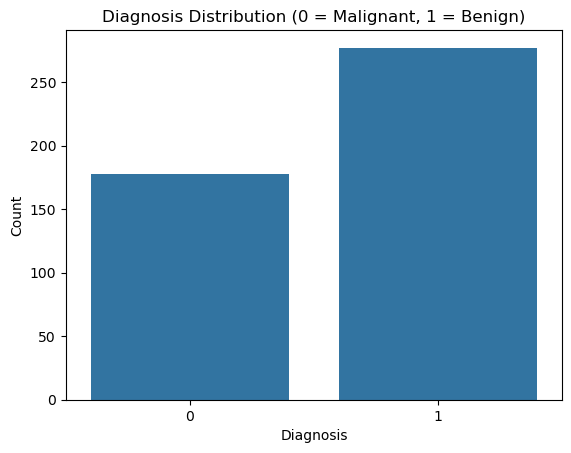

In [9]:
#Class distribution
sns.countplot(x="target", data=train_df)
plt.title("Diagnosis Distribution (0 = Malignant, 1 = Benign)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

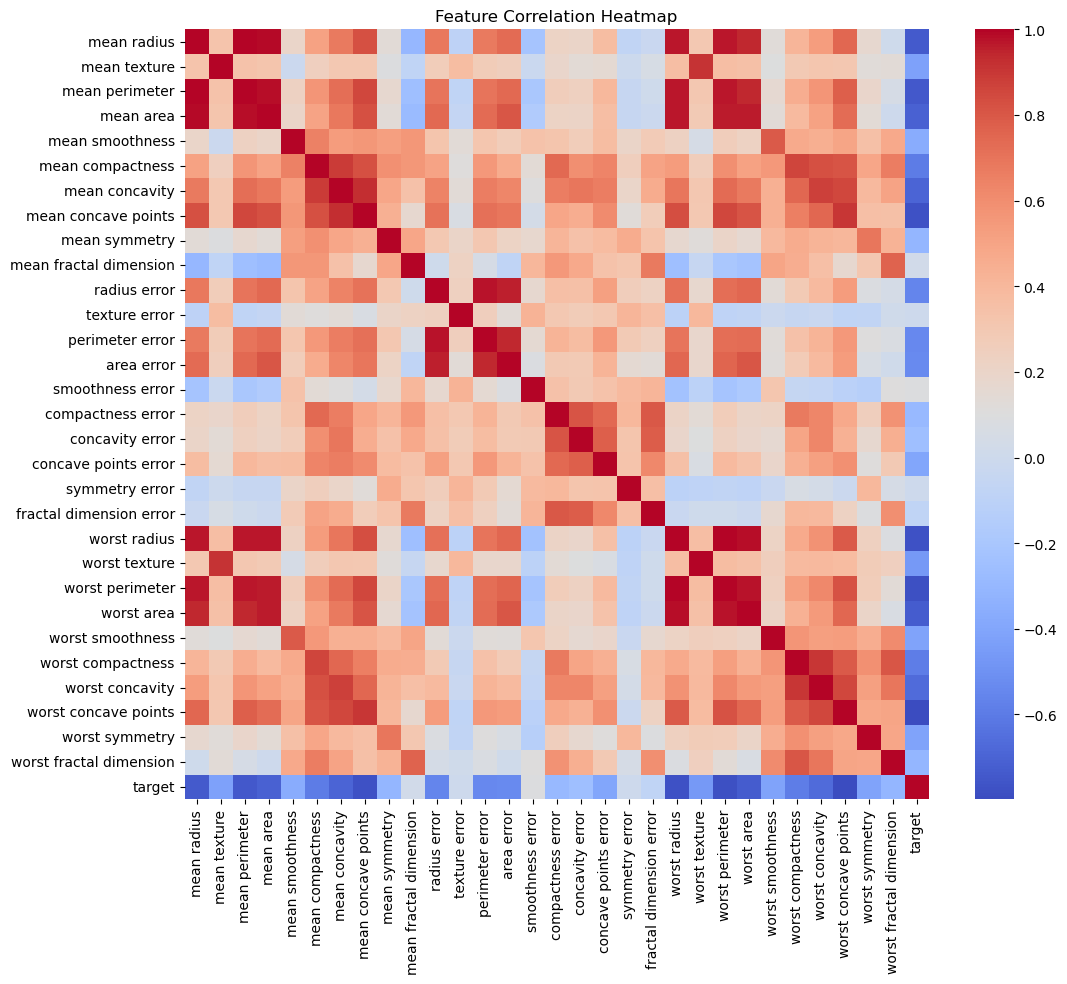

In [10]:
#Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(train_df.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

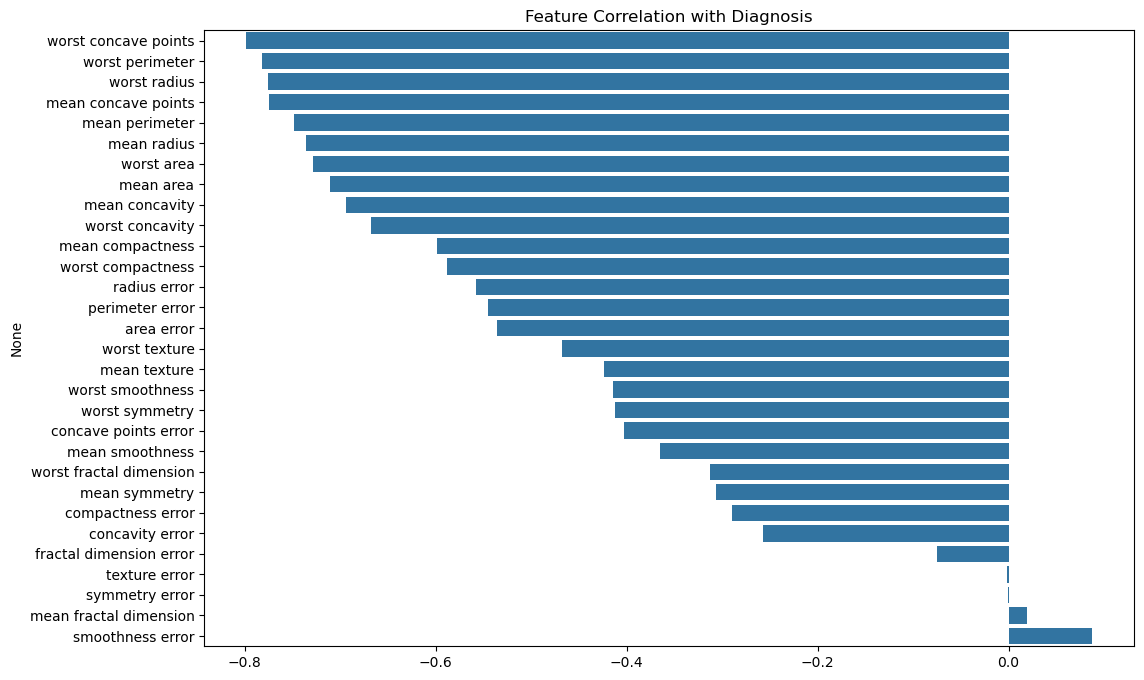

In [11]:
#  Feature correlation with target
plt.figure(figsize=(12, 8))
corr_with_target = train_df.corr()['target'].sort_values()[:-1]
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Feature Correlation with Diagnosis')
plt.show()

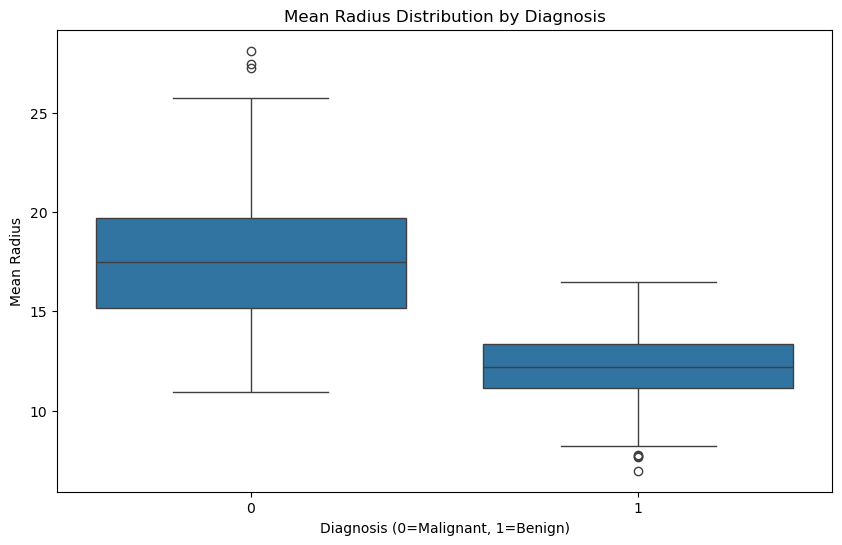

In [12]:
#Distribution of mean radius by diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='mean radius', data=train_df)
plt.title('Mean Radius Distribution by Diagnosis')
plt.xlabel('Diagnosis (0=Malignant, 1=Benign)')
plt.ylabel('Mean Radius')
plt.show()

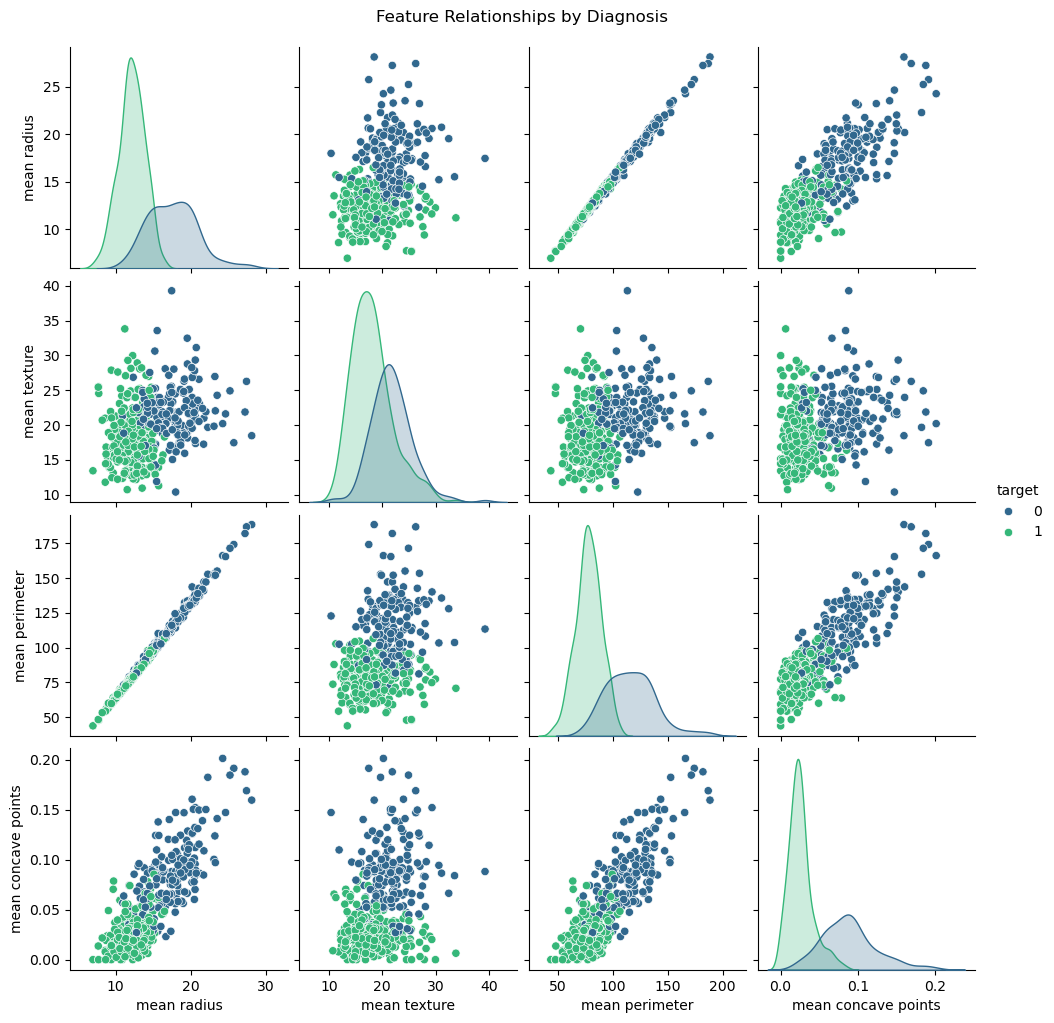

In [13]:
#Pairplot of selected features
sns.pairplot(train_df[['mean radius', 'mean texture', 'mean perimeter', 'mean concave points', 'target']], 
             hue='target', palette='viridis')
plt.suptitle('Feature Relationships by Diagnosis', y=1.02)
plt.show()


Part 2.5: Feature Engineering

In this part, we perform basic feature engineering to improve model performance.
We create new features based on domain logic and correlation patterns.
 
 Chosen features rationale:
 - area_per_radius: Approximates the density of the tumor by dividing area by radius. Denser regions may indicate malignancy.
 - concavity_squared: Enhances differences in concavity which is associated with irregular tumor shapes.
 - mean_texture_ratio: Captures the ratio between texture and smoothness, which can highlight surface complexity.
 - mean_all: Average of all 'mean' features — provides a general size/texture indicator.
 - worst_all: Average of all 'worst' features — emphasizes the most severe characteristics found in the tumor.

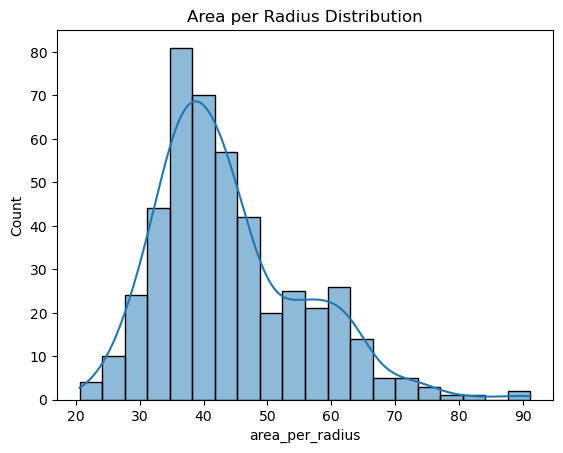

In [14]:
train_df['area_per_radius'] = train_df['mean area'] / (train_df['mean radius'] + 1e-5)
train_df['concavity_squared'] = train_df['mean concavity'] ** 2
train_df['mean_texture_ratio'] = train_df['mean texture'] / (train_df['mean smoothness'] + 1e-5)
train_df['mean_all'] = train_df.filter(like='mean').mean(axis=1)
train_df['worst_all'] = train_df.filter(like='worst').mean(axis=1)

test_df['area_per_radius'] = test_df['mean area'] / (test_df['mean radius'] + 1e-5)
test_df['concavity_squared'] = test_df['mean concavity'] ** 2
test_df['mean_texture_ratio'] = test_df['mean texture'] / (test_df['mean smoothness'] + 1e-5)
test_df['mean_all'] = test_df.filter(like='mean').mean(axis=1)
test_df['worst_all'] = test_df.filter(like='worst').mean(axis=1)

sns.histplot(train_df['area_per_radius'], kde=True)
plt.title("Area per Radius Distribution")
plt.xlabel("area_per_radius")
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

Model Comparison:


,Model,Scaler,Best Params,F1 Macro
0,SVC,StandardScaler,"{'model__C': 0.1, 'model__kernel': 'linear'}",0.9768
1,SVC,MinMaxScaler,"{'model__C': 1, 'model__kernel': 'rbf'}",0.9721
2,Logistic Regression,MinMaxScaler,{'model__C': 10},0.9699
3,Logistic Regression,StandardScaler,{'model__C': 1},0.9698
4,KNN,StandardScaler,{'model__n_neighbors': 10},0.9693
5,KNN,MinMaxScaler,{'model__n_neighbors': 7},0.9674
6,Random Forest,None,"{'max_depth': None, 'n_estimators': 100}",0.9630


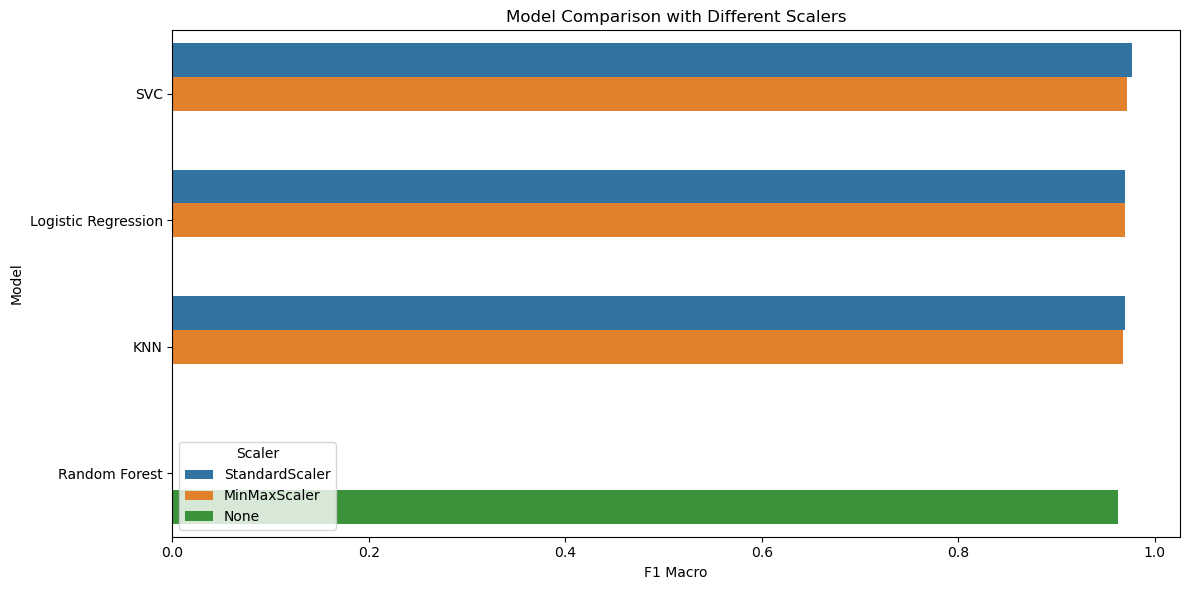

Detailed results for Logistic Regression (StandardScaler):


,param_model__C,mean_test_score
2,1,0.969750
3,10,0.967463
1,0.1,0.967387
0,0.01,0.938489


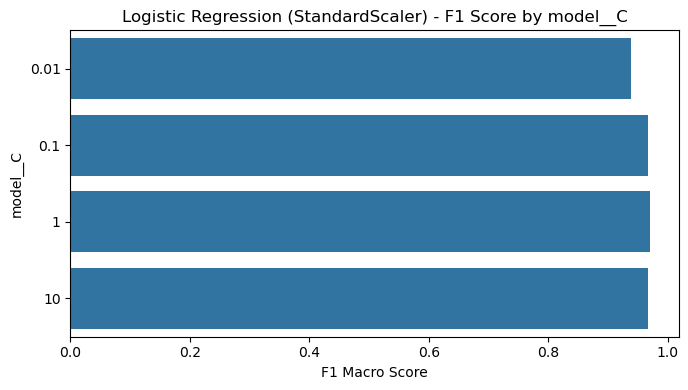

Detailed results for SVC (StandardScaler):


,param_model__C,param_model__kernel,mean_test_score
0,0.1,linear,0.976781
3,1,rbf,0.972108
5,10,rbf,0.972061
2,1,linear,0.969957
4,10,linear,0.960701
1,0.1,rbf,0.938882


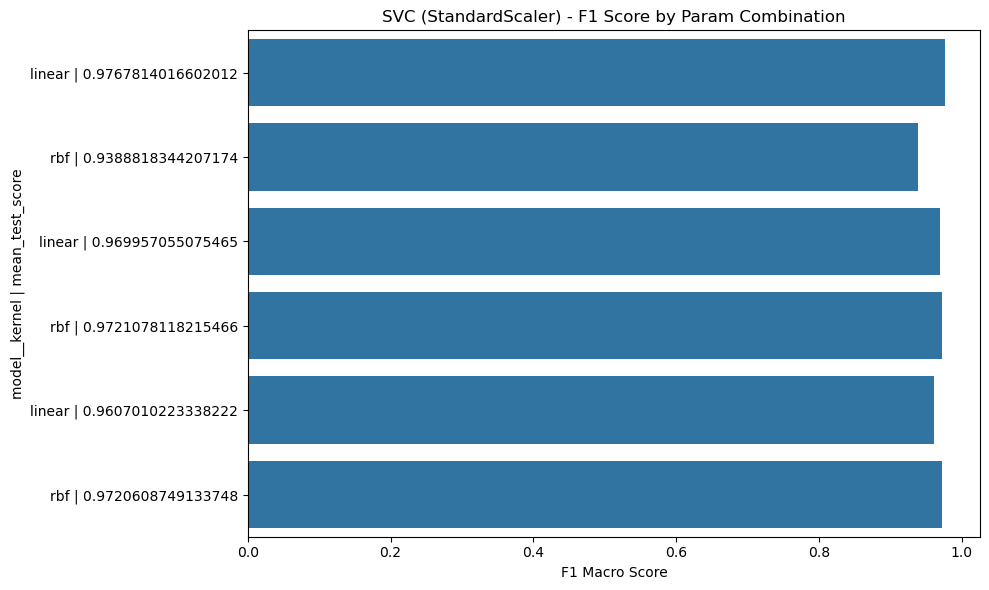

Detailed results for KNN (StandardScaler):


,param_model__n_neighbors,mean_test_score
3,10,0.969349
0,3,0.962585
1,5,0.957940
2,7,0.955355


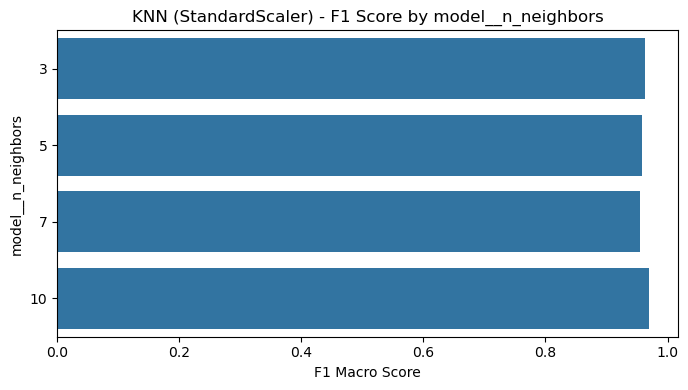

Detailed results for Logistic Regression (MinMaxScaler):


,param_model__C,mean_test_score
3,10,0.969949
2,1,0.960257
1,0.1,0.930863
0,0.01,0.741194


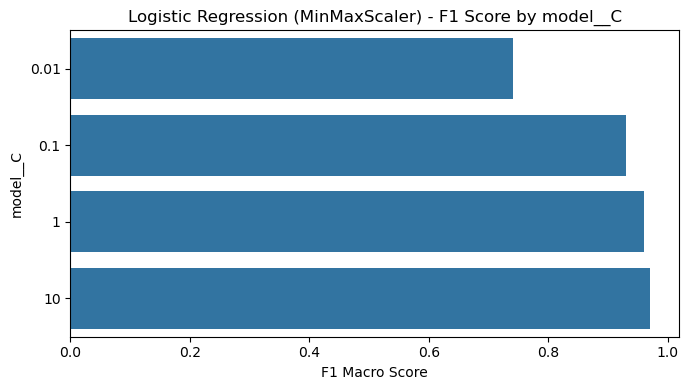

Detailed results for SVC (MinMaxScaler):


,param_model__C,param_model__kernel,mean_test_score
3,1,rbf,0.972087
4,10,linear,0.969949
5,10,rbf,0.965245
2,1,linear,0.962724
0,0.1,linear,0.947988
1,0.1,rbf,0.943268


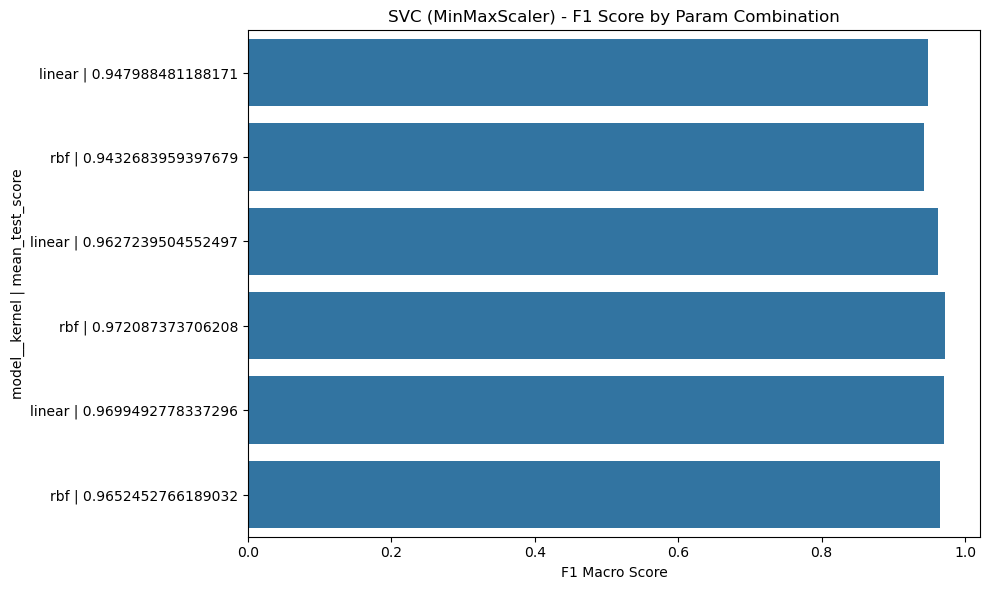

Detailed results for KNN (MinMaxScaler):


,param_model__n_neighbors,mean_test_score
2,7,0.967368
3,10,0.967285
1,5,0.964980
0,3,0.955746


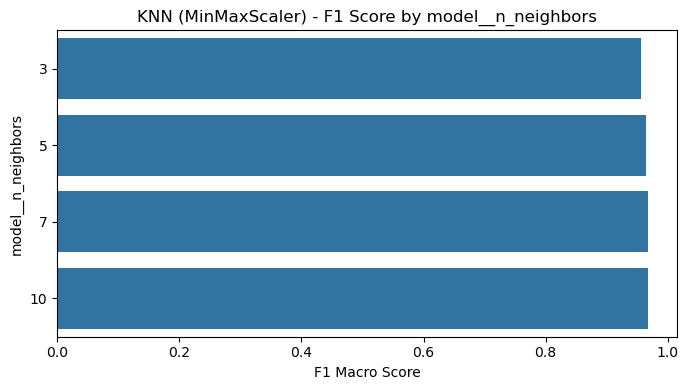

Detailed results for Random Forest (None):


,param_max_depth,param_n_estimators,mean_test_score
5,None,100,0.963039
2,10,50,0.962892
4,None,50,0.960588
3,10,100,0.958391
0,5,50,0.955881
1,5,100,0.953684


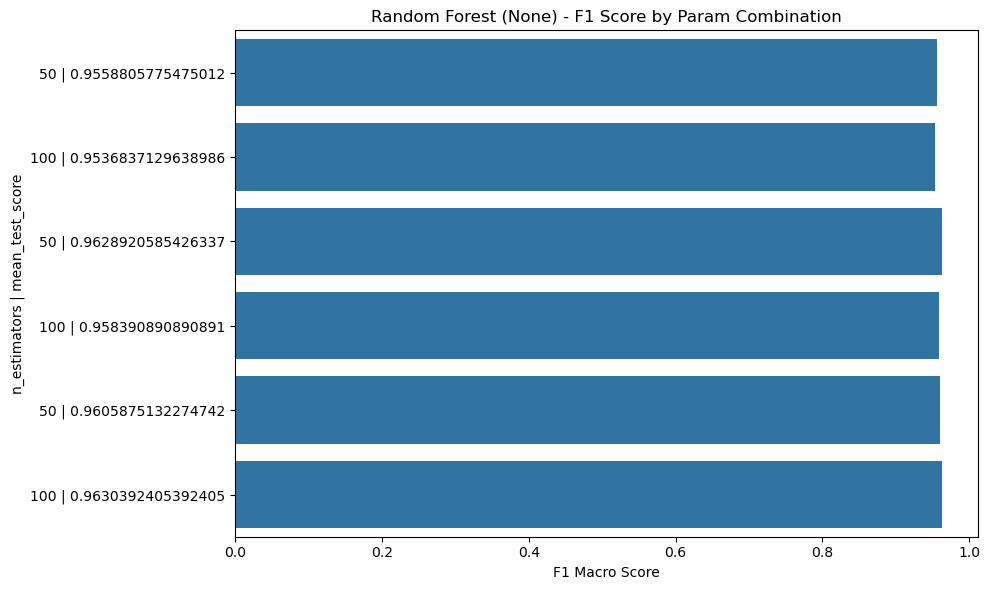

In [49]:
X_train = train_df.drop(columns=["target"])
y_train = train_df["target"]
X_test = test_df.drop(columns=["target"])
y_test = test_df["target"]

results = []
model_map = {}

model_configs = [
    ("Logistic Regression", LogisticRegression(max_iter=5000), {"model__C": [0.01, 0.1, 1, 10]}),
    ("SVC", SVC(), {"model__C": [0.1, 1, 10], "model__kernel": ["linear", "rbf"]}),
    ("KNN", KNeighborsClassifier(), {"model__n_neighbors": [3, 5, 7, 10]})
]
scalers = [
    ("StandardScaler", StandardScaler()),
    ("MinMaxScaler", MinMaxScaler())
]

for scaler_name, scaler in scalers:
    for model_name, model, param_grid in model_configs:
        pipe = Pipeline([
            ("scaler", scaler),
            ("model", model)
        ])
        gs = GridSearchCV(pipe, param_grid, cv=5, scoring="f1_macro")
        gs.fit(X_train, y_train)
        results.append({
            "Model": model_name,
            "Scaler": scaler_name,
            "Best Params": gs.best_params_,
            "F1 Macro": round(gs.best_score_, 4)
        })
        model_key = f"{model_name} ({scaler_name})"
        model_map[model_key] = gs

# Random Forest (no scaling needed)
rf = RandomForestClassifier()
rf_params = {"n_estimators": [50, 100], "max_depth": [5, 10, None]}
gs_rf = GridSearchCV(rf, rf_params, cv=5, scoring="f1_macro")
gs_rf.fit(X_train, y_train)
results.append({
    "Model": "Random Forest",
    "Scaler": "None",
    "Best Params": gs_rf.best_params_,
    "F1 Macro": round(gs_rf.best_score_, 4)
})
model_map["Random Forest (None)"] = gs_rf

# Results Table
results_df = pd.DataFrame(results).sort_values(by="F1 Macro", ascending=False).reset_index(drop=True)
print("Model Comparison:")
display(results_df)

plt.figure(figsize=(12,6))
sns.barplot(data=results_df, x="F1 Macro", y="Model", hue="Scaler")
plt.title("Model Comparison with Different Scalers")
plt.tight_layout()
plt.show()

# Detailed GridSearchCV Results
for key, gs in model_map.items():
    print(f"Detailed results for {key}:")
    param_df = pd.DataFrame(gs.cv_results_)
    display_cols = [col for col in param_df.columns if "param_" in col] + ["mean_test_score"]
    display(param_df[display_cols].sort_values(by="mean_test_score", ascending=False))

    # Simple bar plot for single param
    if len(display_cols) == 2:
        plt.figure(figsize=(7, 4))
        sns.barplot(
            y=param_df[f"{display_cols[0]}"].astype(str),
            x="mean_test_score",
            data=param_df
        )
        plt.xlabel("F1 Macro Score")
        plt.ylabel(display_cols[0].replace('param_', ''))
        plt.title(f"{key} - F1 Score by {display_cols[0].replace('param_', '')}")
        plt.tight_layout()
        plt.show()

    # Grid comparison using grouped barplot for two parameters
    elif len(display_cols) == 3:
        plt.figure(figsize=(10, 6))
        param_df['param_combo'] = (
            param_df[display_cols[1]].astype(str) + ' | ' + param_df[display_cols[2]].astype(str)
        )
        sns.barplot(
            data=param_df,
            x="mean_test_score",
            y="param_combo"
        )
        plt.xlabel("F1 Macro Score")
        plt.ylabel(f"{display_cols[1].replace('param_', '')} | {display_cols[2].replace('param_', '')}")
        plt.title(f"{key} - F1 Score by Param Combination")
        plt.tight_layout()
        plt.show()

Comparison With and Without Feature Engineering:


,Model,Scaler,Best Params,F1 Macro,Feature Engineering
0,SVC,StandardScaler,"{'model__C': 0.1, 'model__kernel': 'linear'}",0.9768,Yes
1,SVC,StandardScaler,"{'model__C': 0.1, 'model__kernel': 'linear'}",0.9768,No
2,SVC,MinMaxScaler,"{'model__C': 10, 'model__kernel': 'linear'}",0.9745,No
3,SVC,MinMaxScaler,"{'model__C': 1, 'model__kernel': 'rbf'}",0.9721,Yes
4,Logistic Regression,StandardScaler,{'model__C': 1},0.9721,No
5,Logistic Regression,MinMaxScaler,{'model__C': 10},0.9699,Yes
6,Logistic Regression,StandardScaler,{'model__C': 1},0.9698,Yes
7,KNN,StandardScaler,{'model__n_neighbors': 10},0.9693,Yes
8,Logistic Regression,MinMaxScaler,{'model__C': 10},0.9675,No
9,KNN,MinMaxScaler,{'model__n_neighbors': 7},0.9674,Yes


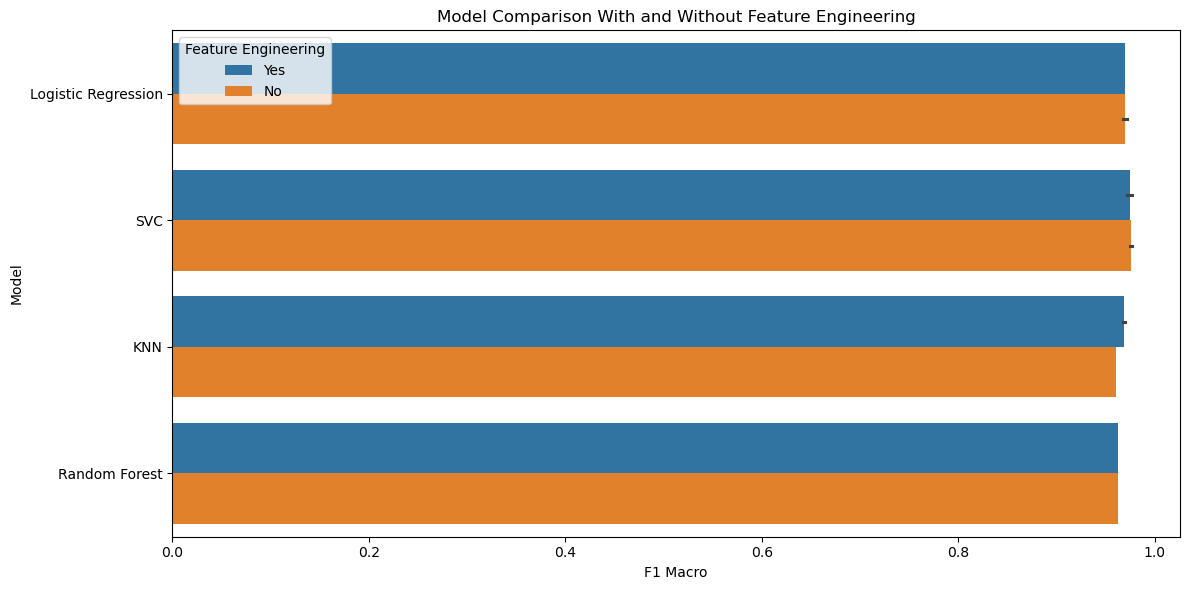

In [27]:
# Evaluate performance without engineered features
baseline_X_train = train_df.drop(columns=["target", "area_per_radius", "concavity_squared", "mean_texture_ratio", "mean_all", "worst_all"])
baseline_X_test = test_df.drop(columns=["target", "area_per_radius", "concavity_squared", "mean_texture_ratio", "mean_all", "worst_all"])

baseline_results = []
baseline_model_map = {}



for scaler_name, scaler in scalers:
    for model_name, model, param_grid in model_configs:
        pipe = Pipeline([
            ("scaler", scaler),
            ("model", model)
        ])
        gs = GridSearchCV(pipe, param_grid, cv=5, scoring="f1_macro")
        gs.fit(baseline_X_train, y_train)
        baseline_results.append({
            "Model": model_name,
            "Scaler": scaler_name,
            "Best Params": gs.best_params_,
            "F1 Macro": round(gs.best_score_, 4),
            "Feature Engineering": "No"
        })
        key = f"{model_name} ({scaler_name})"
        baseline_model_map[key] = gs

# Random Forest without feature engineering
rf = RandomForestClassifier()
rf_params = {"n_estimators": [50, 100], "max_depth": [5, 10, None]}
gs_rf = GridSearchCV(rf, rf_params, cv=5, scoring="f1_macro")
gs_rf.fit(baseline_X_train, y_train)
baseline_results.append({
    "Model": "Random Forest",
    "Scaler": "None",
    "Best Params": gs_rf.best_params_,
    "F1 Macro": round(gs_rf.best_score_, 4),
    "Feature Engineering": "No"
})
baseline_model_map["Random Forest (None)"] = gs_rf

# Reformat previous results to add Feature Engineering flag
for r in results:
    r["Feature Engineering"] = "Yes"

# Combine results
combined_results = pd.DataFrame(results + baseline_results)

# Show combined table
print("Comparison With and Without Feature Engineering:")
display(combined_results.sort_values(by="F1 Macro", ascending=False).reset_index(drop=True))

plt.figure(figsize=(12, 6))
sns.barplot(data=combined_results, x="F1 Macro", y="Model", hue="Feature Engineering")
plt.title("Model Comparison With and Without Feature Engineering")
plt.tight_layout()
plt.show()




## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [37]:
# Find the best model overall from combined results
best_row = combined_results.sort_values(by="F1 Macro", ascending=False).iloc[0]
best_model_key = best_row["Model"] + " (" + best_row["Scaler"] + ")"
best_model = (model_map if best_row["Feature Engineering"] == "Yes" else baseline_model_map)[best_model_key].best_estimator_
best_model.fit(X_train if best_row["Feature Engineering"] == "Yes" else baseline_X_train, y_train)

# Print best model summary
print("\nSelected Best Model:")
print(best_row)




Selected Best Model:


Model                                                           SVC
Scaler                                               StandardScaler
Best Params            {'model__C': 0.1, 'model__kernel': 'linear'}
F1 Macro                                                     0.9768
Feature Engineering                                             Yes
Name: 1, dtype: object

## Part 5 - Apply on test and show model performance estimation

In [37]:
y_pred = best_model.predict(X_test)
print("F1 Score:", f1_score(y_test, y_pred, average="macro"))
print(classification_report(y_test, y_pred))
print("First 5 predictions:", y_pred[:5])

F1 Score: 0.9790441176470588
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.99      0.99      0.99        80

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

First 5 predictions: [1 1 0 1 1]


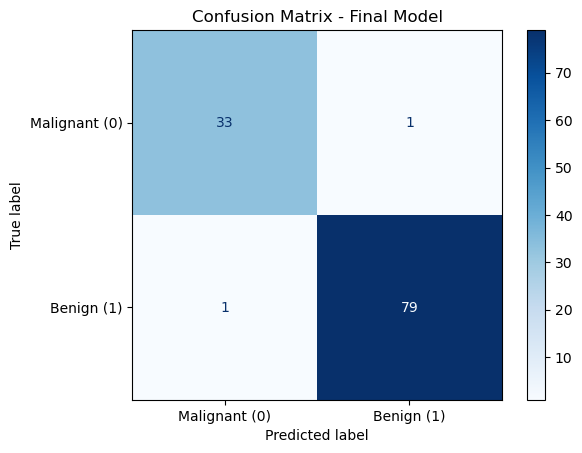

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Malignant (0)", "Benign (1)"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Final Model")
plt.show()

if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    feat_names = X_train.columns
    feat_imp_df = pd.DataFrame({"Feature": feat_names, "Importance": importances})
    feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feat_imp_df, x="Importance", y="Feature", palette="viridis")
    plt.title("Top 10 Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

## In Conclusion
- We performed a full supervised learning pipeline on the Breast Cancer Wisconsin dataset.
- Our process included Exploratory Data Analysis (EDA), Feature Engineering, model selection, and hyperparameter tuning.
- We discovered that Feature Engineering was especially helpful for models sensitive to feature space structure (like KNN), while its effect on models like SVC and Random Forest was minimal.
- The best-performing model was an SVC with a linear kernel and StandardScaler, achieving an F1 Macro score of **0.9768**.
- All models were evaluated on a separate test set and demonstrated strong, stable performance.